**Step 1 : Import the libraries** 

In [1]:
import pandas as pd                                                  # 'panel data' makes easy to manipulate data
import numpy as np                                                   # to allow to generate random  numbers 

import matplotlib.pyplot as plt                                      # to draw graphs
import seaborn as sns                                                # ...
import plotly.express as px                                          # ...

from sklearn.preprocessing import StandardScaler                      # to perform preprocessing part

import umap                                                           # to perform umap 
import umap.plot                                                      # to project umap 

from sklearn.metrics import balanced_accuracy_score                   # to load metrics
from sklearn.metrics import matthews_corrcoef                         # ... 

from sklearn.model_selection import RandomizedSearchCV                # to perform Cross-Validation
from sklearn.model_selection import GridSearchCV                      # ...


**Step 2 : Import data** 

In [2]:
df = pd.read_csv('Dataframe with picks.csv')                       # to download the data from the file into a dataframe called df
df.head()                                                             # to view the top 5 rows 


,Unnamed: 0,SMILES_new,ExactMolWt,qed,FpDensityMorgan2,TPSA,NumHAcceptors,NumHDonors,MolLogP,FractionCSP3,...,Outcome,pIC50,InChIKey,desalted\demetalled,mixture,complex,changes,Clusters,fingerprint,ID
0,2,Cc1cc(C)n(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n...,368.196074,0.719563,1.962963,89.08,7.0,1.0,2.73776,0.368421,...,1,6.187087,AACWUFIIMOHGSO-UHFFFAOYSA-N,False,False,False,NaN,2,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,PICKS
1,4,Cc1ccc(NC(=O)C(COC(C)C)Oc2ncnc3c2cnn3-c2ncccc2...,467.147265,0.418807,2.000000,116.94,9.0,1.0,3.37842,0.272727,...,0,NaN,AAGISEXHOPCAHZ-UHFFFAOYSA-N,False,False,False,NaN,4,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,PICKS
2,5,Cc1ncoc1-c1nnc(SCCCN2CCC3(CC3c3ccccc3)C2)n1C,409.193631,0.431725,2.103448,59.98,7.0,0.0,4.14032,0.500000,...,1,5.420000,AAPXNHMQKBDDJN-UHFFFAOYNA-N,False,False,False,NaN,5,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,PICKS
3,6,CN(C)Cc1ccc(C(F)(F)F)cc1Oc1ccc(Cl)c(Cl)c1,363.040454,0.673225,1.695652,12.47,2.0,0.0,5.86610,0.250000,...,1,5.950782,AAQZZAVVFRIEOD-UHFFFAOYSA-N,False,False,False,NaN,6,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,PICKS
4,10,O=C(Cc1ccc(-n2cnnn2)cc1)N1CCN(CCc2ccc3c(c2)COC...,418.211724,0.605615,1.709677,76.38,7.0,0.0,1.62190,0.391304,...,1,5.602060,AAYRYIFNKRSGOF-UHFFFAOYSA-N,False,False,False,NaN,7,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,PICKS


**Step 3 : UMAP**

In [3]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0.01, n_jobs=-1)      # to construct a UMAP object

*1 : Standardize the data*

In [4]:

features = ['ExactMolWt','qed','FpDensityMorgan2','TPSA','NumHAcceptors','NumHDonors','MolLogP','FractionCSP3','NumRotatableBonds','HeavyAtomCount', 'NumAliphaticCarbocycles', 'NumAromaticCarbocycles', 'NumAliphaticHeterocycles','NumAromaticHeterocycles','NumAromaticRings']
X = df.loc[:, features].values

Y = df.loc[:,['Outcome']].values

# to separate the features and the outcome

Xscaled = StandardScaler().fit_transform(X)         

# to convert each feature into z-scores (number of standard deviations from the mean) for comparability

*2 : Train the reducer*

In [5]:
embedding = reducer.fit_transform(Xscaled)
embedding.shape

(1800, 2)

In [6]:
# to set plotting style
plt.style.use('ggplot') # to set plotting style
plot_kwds = {'alpha' : 0.2, 's' : 30, 'linewidths':3}    

*3 : HBDSCAN*

In [7]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=70, gen_min_span_tree=True)       # to cluster the data 
clusterer.fit(embedding)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=70)

{0, 1, 2, 3, -1}


Text(0.5, 1.0, 'Histogram presenting the size of the clusters')

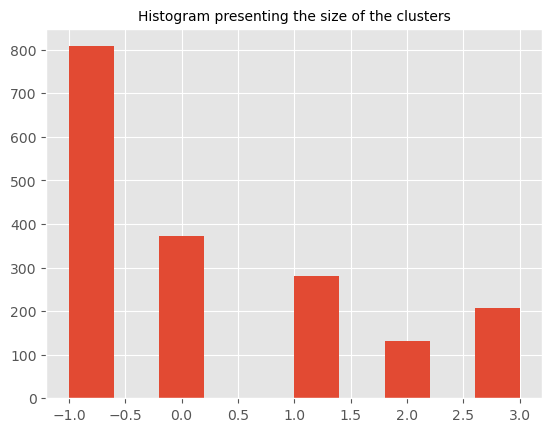

In [8]:
plt.hist(clusterer.labels_)
print(set(clusterer.labels_))
N = len(set(clusterer.labels_))

plt.title('Histogram presenting the size of the clusters', fontsize=10)

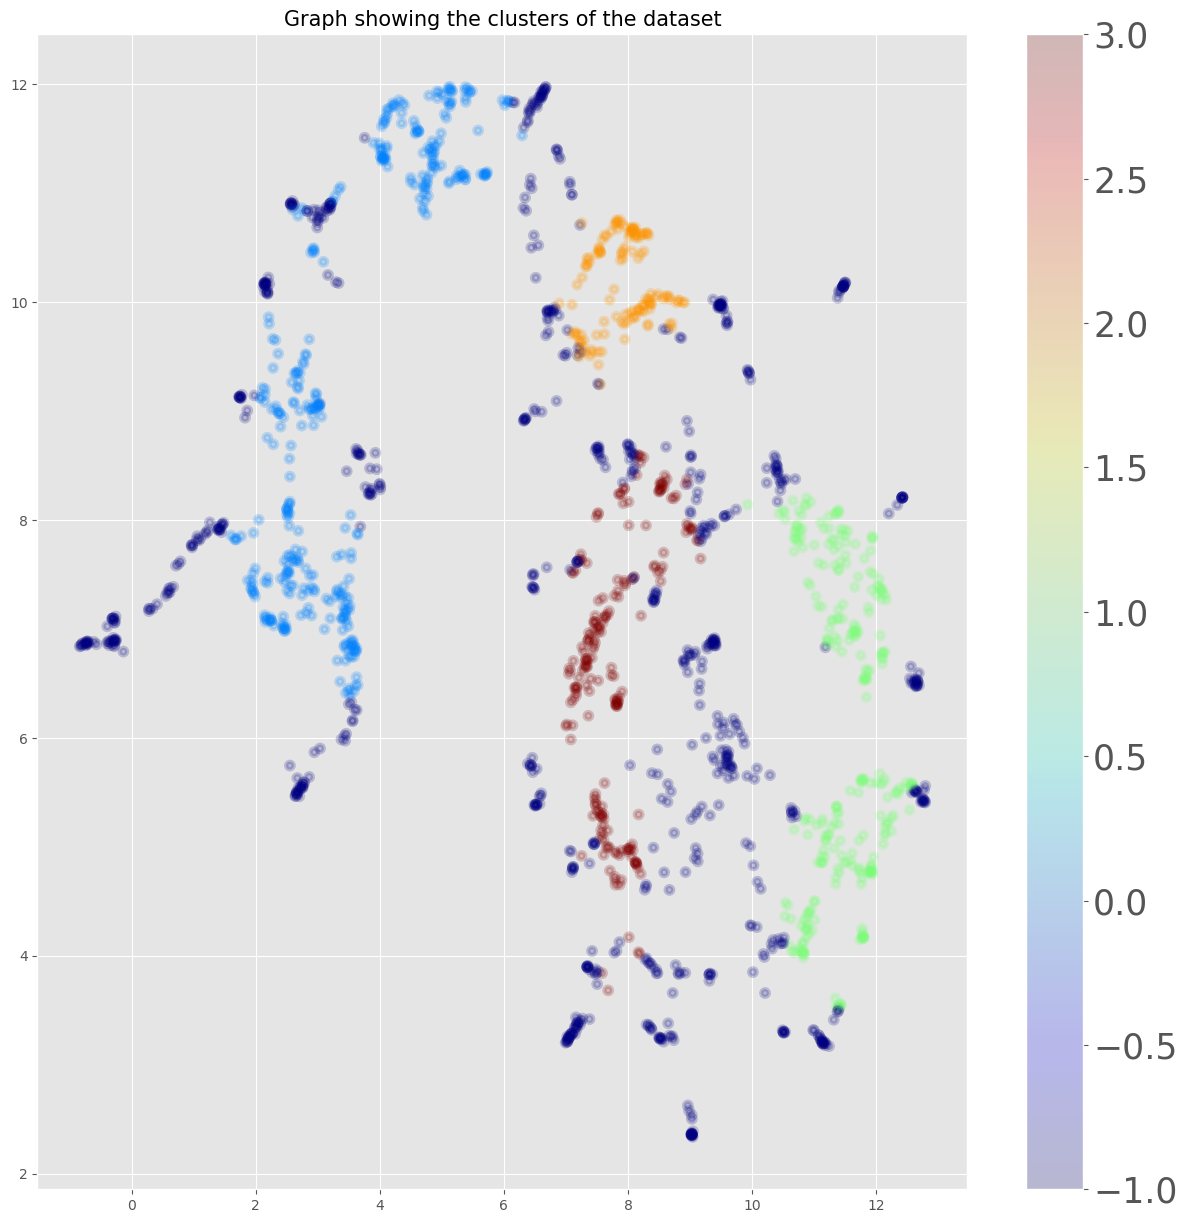

In [9]:
plot_kwds = {'alpha' : 0.2, 's' : 30, 'linewidths':3}   

# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

f, ax = plt.subplots(figsize=(15,15))
points = plt.scatter(embedding.T[0], embedding.T[1], c=clusterer.labels_, cmap=cmap, **plot_kwds)

frame = plt.gca()                                          # to remove values on the y axe
frame.axes.get_xaxis().set_visible(True)
frame.axes.get_yaxis().set_visible(True)

plt.title('Graph showing the clusters of the dataset', fontsize=15)
cbar = f.colorbar(points)
cbar.ax.tick_params(labelsize=25) 